In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
ST 2: Mathematical Modeling of Propagation Phenomena
TD 2: Centrality Criteria 
12 December 2018
"""
from helper import *
import numpy as np
import scipy.sparse as sparse
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
#################################### Part I ###################################

# Read the edgelist of the NetScience network
G = nx.read_edgelist("./NetScience.edgelist", comments='#', delimiter='\t')
# Get the largest connected component of the network
G = max(nx.connected_component_subgraphs(G), key=len) 
                

In [6]:
# Exercise 1.1-1.5
def compute_degree_centrality(graph):
    '''
    :param graph:
    :return:
        degree_centrality:
        Dictionary of nodes with degree centrality as the value
    '''
    degree_centrality = graph.degree#
    
    return degree_centrality


In [7]:
compute_degree_centrality(G)['343']

10

In [8]:
def compute_closeness_centrality(graph):
    '''
    :param graph:
    :return:
        closeness_centrality:
        Dictionary of nodes with closeness centrality as the value
    '''
    closeness_centrality = {}
    number_nodes = len(list(graph.nodes))
    for node in graph.nodes:
        closeness_centrality[node] =(number_nodes-1)/sum(list(nx.single_source_shortest_path_length(G, node , cutoff = None ).values()))
    return closeness_centrality


In [9]:
def compute_harmonic_centrality(graph):
    '''
    :param graph:
    :return:
        harmonic_centrality:
        Dictionary of nodes with harmonic centrality as the value
    '''
    harmonic_centrality = {}
    for node in graph.nodes:
        harmonic_centrality[node] =1/sum(list(nx.single_source_shortest_path_length(G, node , cutoff = None ).values()))


    ###
    return harmonic_centrality

In [12]:
def compute_core_number(graph):
    '''
    :param graph:
    :return:
        core_number:
        Dictionary of nodes with core number as the value
    '''
    G = graph.copy()
    core_number = {}
    max_degree = max(dict(compute_degree_centrality(G)).values())
    n_nodes = len(list(graph.nodes))
    counter = 0
    for k in range(max_degree + 1):
        continue_searching = True
        if counter <= n_nodes:
            while (continue_searching):
                #print('no while de  {}'.format(k))
                for node in graph.nodes:
                    if node not in core_number:
                        #print('node {}'.format(node))
                        if (compute_degree_centrality(G)[node] <= k):
                            #print('pop {}'.format(node))
                            G.remove_node(node)
                            counter += 1
                            core_number[node] = k
                continue_searching = False
                for x in  dict(compute_degree_centrality(G)).values():
                    if x <= k:
                        continue_searching = True

    return core_number

In [19]:
''''testing if the algorithm works'''''
print(compute_core_number(G) == nx.core_number(G))

True


In [21]:
def compute_neighborhood_coreness(graph):
    '''
    :param graph:
    :return:
        nb_coreness:
        Dictionary of nodes with core number as the value
    '''
    nb_coreness = {}
    for node in graph.nodes:
        C = 0
        for neighbor in nx.neighbors(graph,node):
            C += nx.core_number(G)[neighbor]
        nb_coreness[node] = C
    
    

    ###
    return nb_coreness

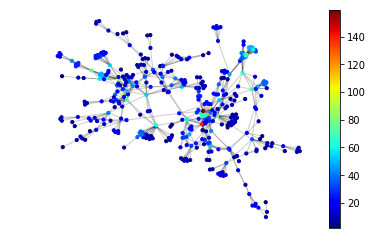

In [31]:
## Exercise 1.6
# Choose your centrality measure
node2values = compute_neighborhood_coreness(G)
visualize(graph=G, values=node2values, node_size=10)